<a href="https://colab.research.google.com/github/luorix1/ML_DL-self_study/blob/main/dropout_save_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [ ]:
def make_model(layers=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  if layers:
    model.add(layers)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
test = make_model()
test.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = test.fit(train_scaled, train_target, epochs=20, verbose=0)

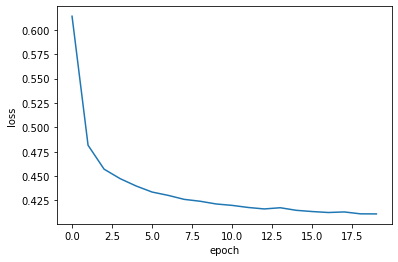

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

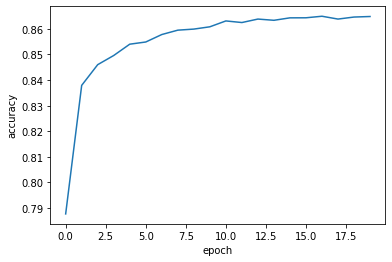

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
history = test.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4120 - accuracy: 0.8668 - val_loss: 0.4407 - val_accuracy: 0.8643
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4110 - accuracy: 0.8656 - val_loss: 0.4459 - val_accuracy: 0.8625
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4110 - accuracy: 0.8671 - val_loss: 0.4552 - val_accuracy: 0.8582
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4101 - accuracy: 0.8665 - val_loss: 0.4455 - val_accuracy: 0.8650
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4091 - accuracy: 0.8669 - val_loss: 0.4524 - val_accuracy: 0.8634
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4098 - accuracy: 0.8678 - val_loss: 0.4519 - val_accuracy: 0.8626
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4090 - accuracy: 0.8660 - val_loss: 0.4530 - val_accuracy:

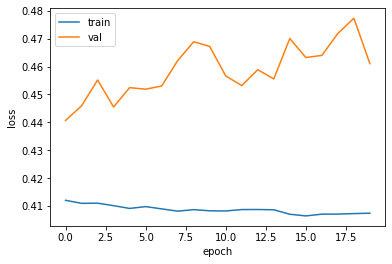

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# with 'adam' optimizer
model = make_model()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6296 - accuracy: 0.7890 - val_loss: 0.5054 - val_accuracy: 0.8313
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4763 - accuracy: 0.8376 - val_loss: 0.4576 - val_accuracy: 0.8456
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4465 - accuracy: 0.8447 - val_loss: 0.4345 - val_accuracy: 0.8543
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4316 - accuracy: 0.8511 - val_loss: 0.4261 - val_accuracy: 0.8593
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4182 - accuracy: 0.8551 - val_loss: 0.4324 - val_accuracy: 0.8579
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4116 - accuracy: 0.8581 - val_loss: 0.4316 - val_accuracy: 0.8543
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4061 - accuracy: 0.8587 - val_loss: 0.4123 - val_accuracy:

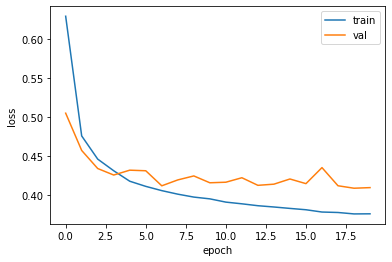

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# with dropout
dropout = make_model(keras.layers.Dropout(0.3))

In [ ]:
dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = dropout.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6918 - accuracy: 0.7585 - val_loss: 0.5243 - val_accuracy: 0.8235
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5427 - accuracy: 0.8108 - val_loss: 0.4734 - val_accuracy: 0.8445
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5153 - accuracy: 0.8188 - val_loss: 0.4561 - val_accuracy: 0.8482
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5026 - accuracy: 0.8231 - val_loss: 0.4501 - val_accuracy: 0.8489
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5013 - accuracy: 0.8246 - val_loss: 0.4445 - val_accuracy: 0.8503
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4964 - accuracy: 0.8257 - val_loss: 0.4360 - val_accuracy: 0.8555
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4936 - accuracy: 0.8240 - val_loss: 0.4393 - val_accuracy:

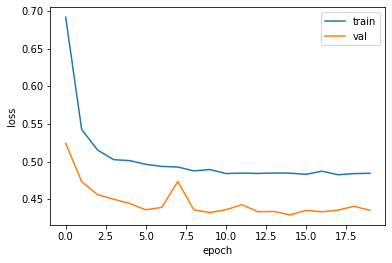

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
dropout.save_weights('model-weights.h5')

In [ ]:
ls -al *.h5

-rw-r--r-- 1 root root 41640 Sep 19 01:36 model-weights.h5


In [ ]:
new_model = make_model(keras.layers.Dropout(0.3))

In [ ]:
new_model.load_weights('model-weights.h5')

In [ ]:
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
predictions = new_model.predict(val_scaled)

In [ ]:
print(np.mean(np.argmax(predictions, axis=-1) == val_target))

0.8535


In [ ]:
saved = new_model.save('model-whole.h5')

In [ ]:
loaded = keras.models.load_model('model-whole.h5')

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8619


[0.40999945998191833, 0.8619166612625122]